# Importing Dataset and Libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

2023-06-29 21:16:21.700636: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-29 21:16:21.737039: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 21:16:21.943237: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 21:16:21.944669: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 21:16:23.549528: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [8]:
!unzip ECG5000.zip

Archive:  ECG5000.zip
  inflating: ECG5000.txt             
  inflating: ECG5000_TEST.arff       
  inflating: ECG5000_TEST.txt        
  inflating: ECG5000_TRAIN.arff      
  inflating: ECG5000_TRAIN.txt       
  inflating: ECG5000_TEST.ts         
  inflating: ECG5000_TRAIN.ts        


In [9]:
!cat ECG5000_TRAIN.txt ECG5000_TEST.txt > ecg_final.txt

In [10]:
df=pd.read_csv('ecg_final.txt', sep='  ', header=None)

/tmp/ipykernel_283036/846199113.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('ecg_final.txt', sep='  ', header=None)


In [12]:
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4.0,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,...,0.205543,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334
4996,2.0,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,...,1.218185,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932
4997,2.0,-1.351779,-2.209006,-2.520225,-3.061475,-3.065141,-3.030739,-2.622720,-2.044092,-1.295874,...,-0.896575,-1.512234,-2.076075,-2.586042,-3.322799,-3.627311,-3.437038,-2.260023,-1.577823,-0.684531
4998,2.0,-1.124432,-1.905039,-2.192707,-2.904320,-2.900722,-2.761252,-2.569705,-2.043893,-1.490538,...,-2.495989,-2.821782,-3.268355,-3.634981,-3.168765,-2.245878,-1.262260,-0.443307,-0.559769,0.108568


In [13]:
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [14]:
df = df.add_prefix("c")
df.columns

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c138', 'c139',
       'c140'],
      dtype='object', length=141)

In [15]:
df["c0"].value_counts()

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: c0, dtype: int64

# Train Test Split

In [16]:
train_data, test_data, train_labels, test_labels = train_test_split(df.values, df.values[:,0:1], test_size=0.2, random_state=111)

# Scaling Data

In [17]:
scaler = MinMaxScaler()
data_scaled = scaler.fit(train_data)

In [18]:
train_data_scaled = scaler.transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [19]:
train_data_scaled

array([[0.        , 0.50002524, 0.42299659, ..., 0.61680162, 0.58388556,
        0.3649298 ],
       [0.        , 0.48602565, 0.31200637, ..., 0.60438613, 0.6676527 ,
        0.40538671],
       [0.        , 0.6760041 , 0.6161329 , ..., 0.73484988, 0.64562905,
        0.43438114],
       ...,
       [0.25      , 0.70698484, 0.7982501 , ..., 0.23053824, 0.31421167,
        0.37774737],
       [0.        , 0.46498254, 0.25827775, ..., 0.6340938 , 0.66453824,
        0.47717869],
       [0.25      , 0.69314707, 0.79831145, ..., 0.68561341, 0.61110713,
        0.53512758]])

Splitting normal data and anamoly data

In [20]:
normal_train_data= pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

In [21]:
normal_test_data= pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

In [22]:
print(normal_train_data.shape)
print(normal_test_data.shape)

(2356, 140)
(563, 140)


In [23]:
print(anomaly_train_data.shape)
print(anomaly_test_data.shape)

(1644, 140)
(437, 140)


# Plotting Normal and Anamoly data

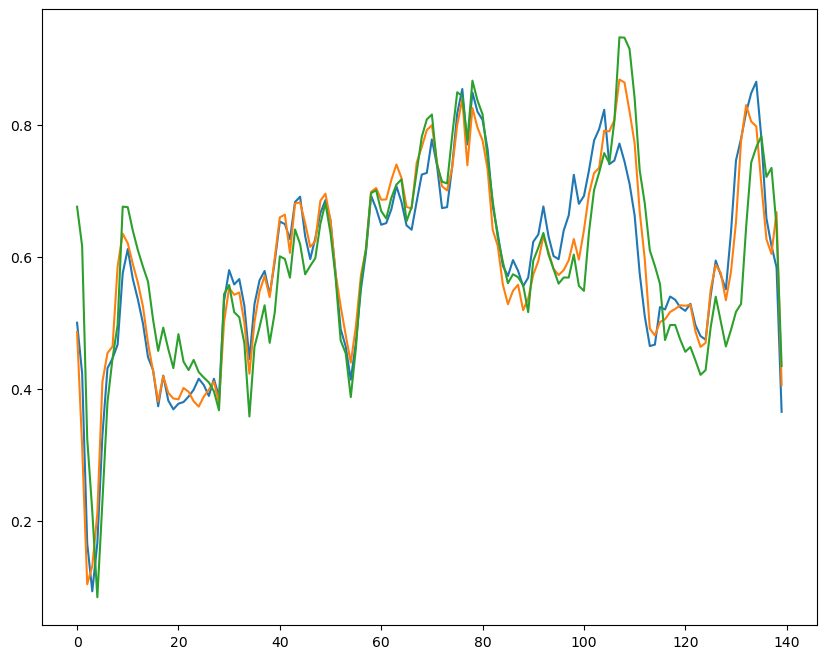

In [24]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])

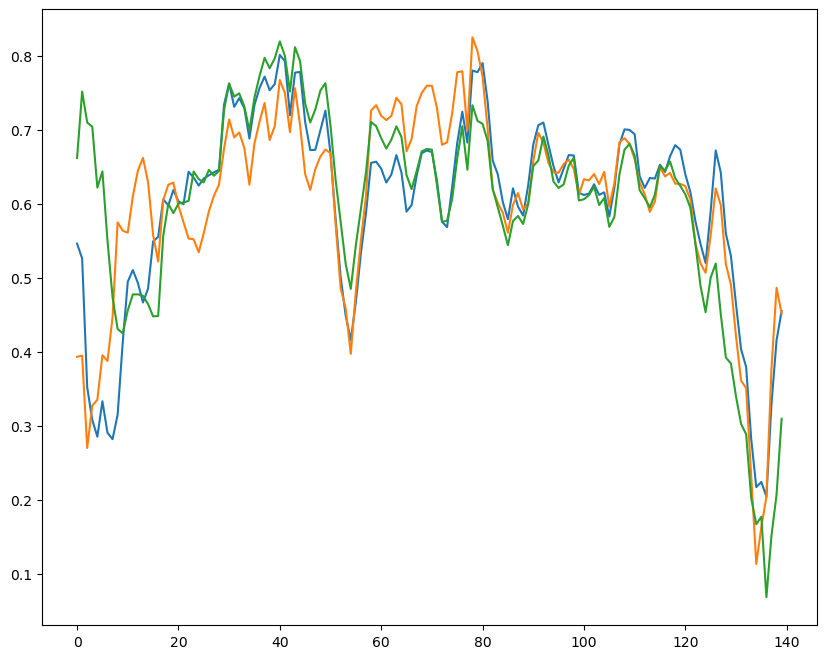

In [25]:
plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[2])

# Building the model

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu')) 
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(140, activation='sigmoid'))

In [27]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [28]:
model= AutoEncoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(optimizer='adam', loss='mae')

Fitting model on entire training set, that is even including anamoly data, so as to train the encoder not just to create a function which is x1 of the input and also in order to prevent model to fit entirely on the anamoly data, "early stopping" callback is used.

In [29]:
history = model.fit(normal_train_data, normal_train_data, 
          epochs=50, 
          batch_size=128,
          validation_data=(train_data_scaled[:,1:], train_data_scaled[:,1:]),
          shuffle=True,
          callbacks=[early_stopping])

Epoch 1/50
19/19 [==============================] - 2s 14ms/step - loss: 0.1286 - val_loss: 0.1108
Epoch 2/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0775 - val_loss: 0.0824
Epoch 3/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0521 - val_loss: 0.0764
Epoch 4/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0484 - val_loss: 0.0761
Epoch 5/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0479 - val_loss: 0.0754
Epoch 6/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0477 - val_loss: 0.0747
Epoch 7/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0476 - val_loss: 0.0748
Epoch 8/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0474 - val_loss: 0.0742
Epoch 9/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0471 - val_loss: 0.0736
Epoch 10/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0467 - val_loss: 0.0731
Epoch 11/50
19/19 

In [30]:
encoder_out = model.encoder(normal_test_data).numpy()
decoder_out = model.decoder(encoder_out).numpy()

In [31]:
encoder_out.shape

(563, 8)

In [32]:
decoder_out.shape

(563, 140)

# Plotting original data vs predicted data

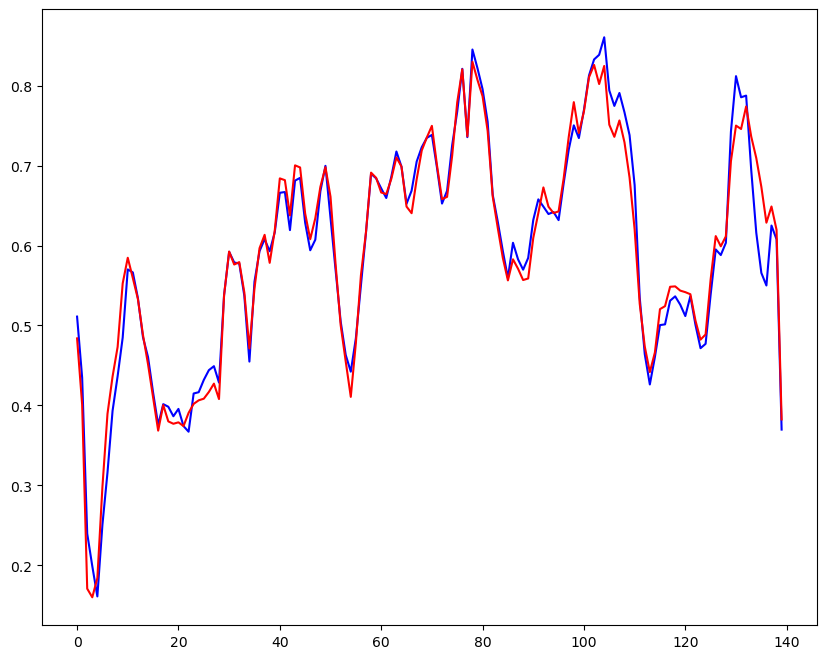

In [33]:
plt.plot(normal_test_data[0],'b')
plt.plot(decoder_out[0],'r')

In [34]:
encoder_out_a = model.encoder(anomaly_test_data).numpy()
decoder_out_a = model.decoder(encoder_out_a).numpy()

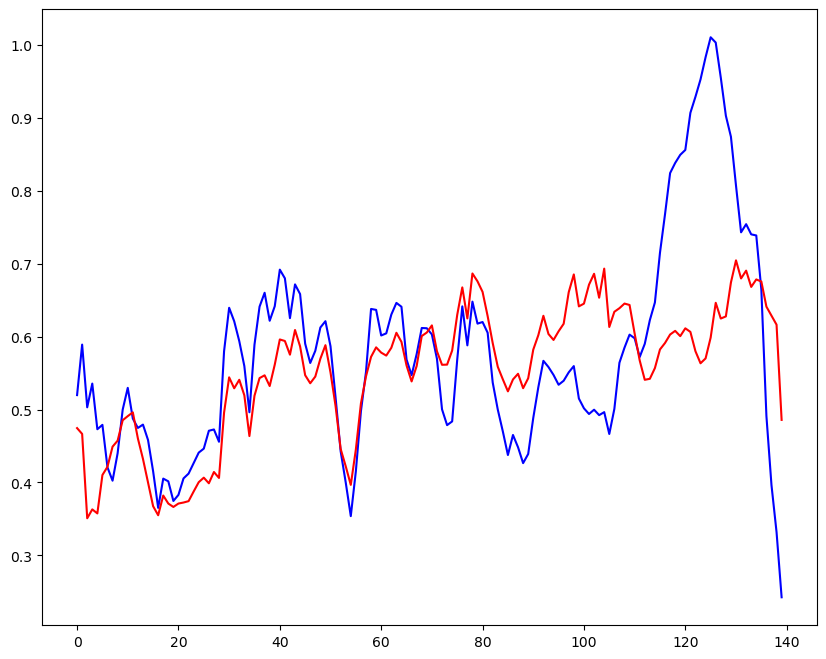

In [35]:
plt.plot(anomaly_test_data[0],'b')
plt.plot(decoder_out_a[0],'r')

18/18 [==============================] - 0s 1ms/step


(array([ 4., 14., 28., 42., 61., 63., 45., 54., 46., 38., 27., 20., 10.,
        19., 10., 11.,  5.,  6., 10.,  6.,  6.,  2.,  7.,  4.,  4.,  4.,
         2.,  2.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  3.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  1.,  1.]),
 array([0.00972105, 0.011438  , 0.01315495, 0.0148719 , 0.01658885,
        0.0183058 , 0.02002275, 0.0217397 , 0.02345665, 0.0251736 ,
        0.02689055, 0.0286075 , 0.03032445, 0.0320414 , 0.03375835,
        0.0354753 , 0.03719225, 0.0389092 , 0.04062615, 0.0423431 ,
        0.04406005, 0.045777  , 0.04749395, 0.04921089, 0.05092784,
        0.05264479, 0.05436174, 0.05607869, 0.05779564, 0.05951259,
        0.06122954, 0.06294649, 0.06466344, 0.06638039, 0.06809734,
        0.06981429, 0.07153124, 0.07324819, 0.07496514, 0.07668209,
        0.07839904, 0.08011599, 0.08183294, 0.08354989, 0.08526684,
        0.08698379, 0.08870074, 0.09041769, 0.09213464, 0.09385159,
        0.09556854]),
 <BarContainer

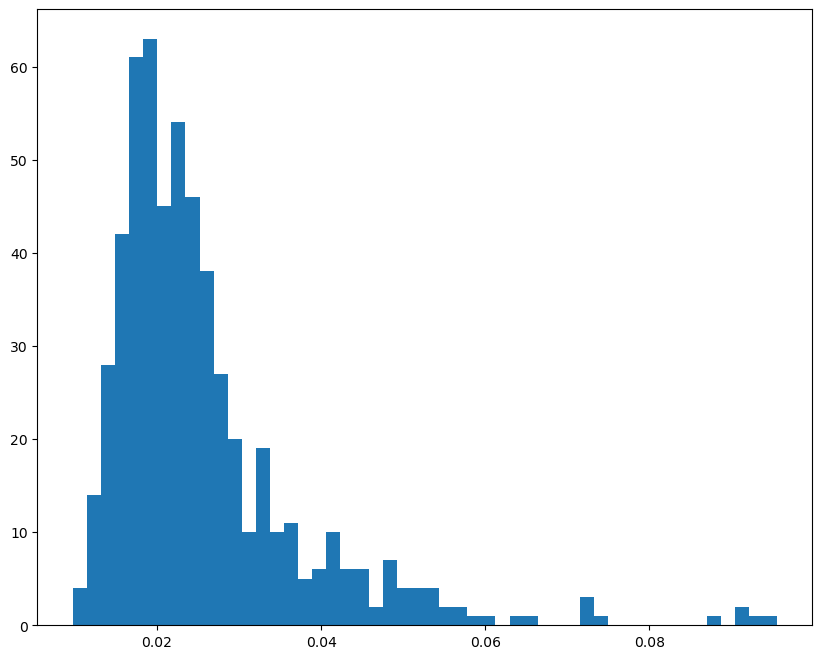

In [36]:
reconstructions = model.predict(normal_test_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_test_data)

plt.hist(train_loss, bins=50)

In [37]:
np.mean(train_loss) 

0.02576541909797579

In [38]:
np.std(train_loss)

0.012227143204955866

Threshold can be varied according to the requirement

Say: Mean + 1 std devi

(or) Mean + 2 std devi etc.,

In [39]:
threshold = np.mean(train_loss) + 2*np.std(train_loss)

In [40]:
threshold

0.05021970550788752

14/14 [==============================] - 0s 1ms/step


(array([ 1.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,  1.,  3.,  1.,  3.,  6.,
        10., 19., 21., 41., 50., 48., 41., 53., 38., 32., 25., 18.,  4.,
         5.,  2.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  1.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.03067142, 0.03401441, 0.03735741, 0.0407004 , 0.04404339,
        0.04738638, 0.05072937, 0.05407237, 0.05741536, 0.06075835,
        0.06410134, 0.06744433, 0.07078733, 0.07413032, 0.07747331,
        0.0808163 , 0.08415929, 0.08750229, 0.09084528, 0.09418827,
        0.09753126, 0.10087425, 0.10421725, 0.10756024, 0.11090323,
        0.11424622, 0.11758921, 0.1209322 , 0.1242752 , 0.12761819,
        0.13096118, 0.13430417, 0.13764716, 0.14099016, 0.14433315,
        0.14767614, 0.15101913, 0.15436212, 0.15770512, 0.16104811,
        0.1643911 , 0.16773409, 0.17107708, 0.17442008, 0.17776307,
        0.18110606, 0.18444905, 0.18779204, 0.19113504, 0.19447803,
        0.19782102]),
 <BarContainer

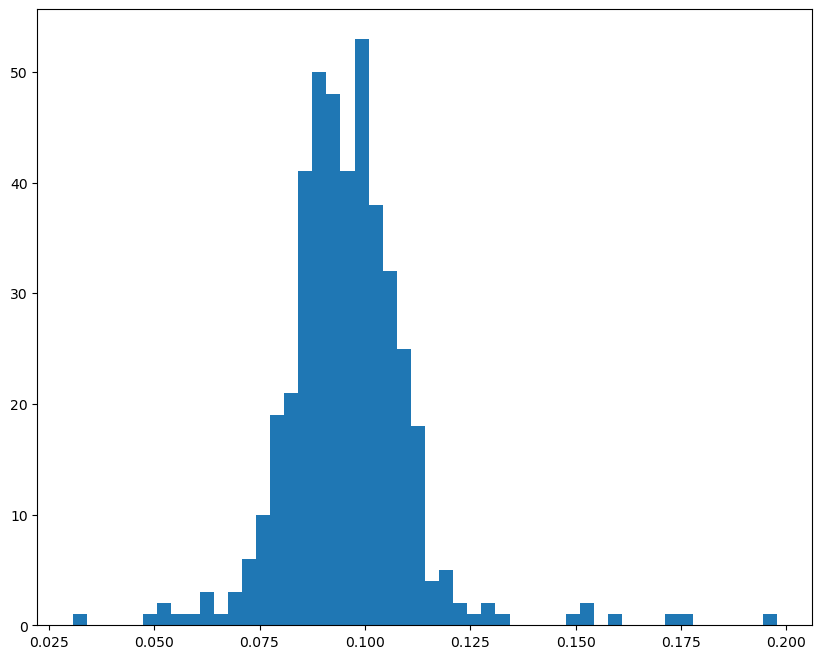

In [41]:
reconstructions_a = model.predict(anomaly_test_data)
train_loss_a = tf.keras.losses.mae(reconstructions_a, anomaly_test_data)

plt.hist(train_loss_a, bins=50)

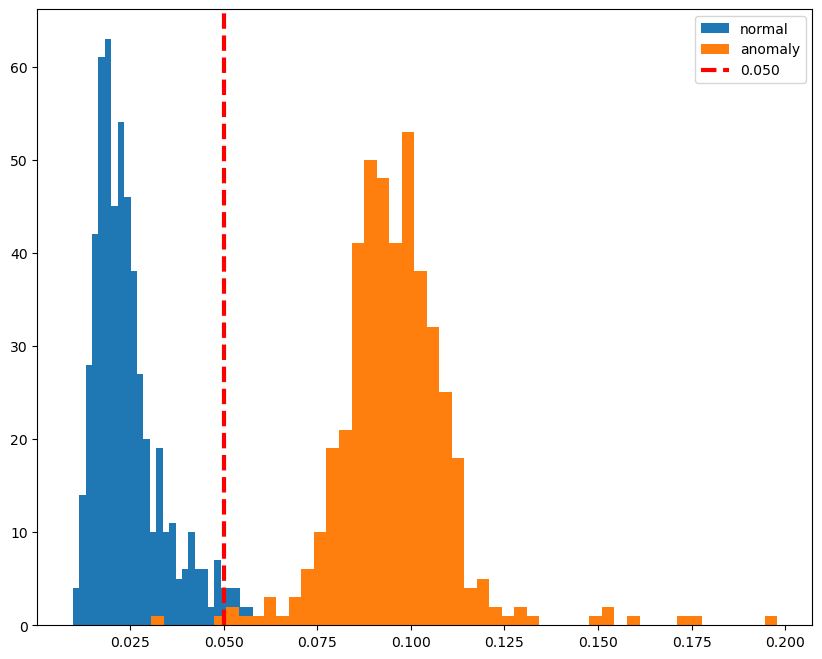

In [42]:
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_a, bins=50, label='anomaly')
plt.axvline(threshold, color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.show()

# Checking the predictions

In [43]:
preds = tf.math.less(train_loss, threshold)
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=534>

In [44]:
preds.shape

TensorShape([563])

In [45]:
preds_a = tf.math.greater(train_loss_a, threshold)
tf.math.count_nonzero(preds_a)

<tf.Tensor: shape=(), dtype=int64, numpy=435>

In [46]:
preds_a.shape

TensorShape([437])

In [3]:
TP = 435 # (TP + FN) = Total positives
FN = 2   # (TN + Fp) = Total negatives
TN = 534 # Here Positive -> Anamoly detection
FP = 29

accuracy = (TP + TN)/(TP + FN + TN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy*100}%")
print(f"Precision: {precision*100}%")
print(f"Recall: {recall*100}%")
print(f"F1_score: {f1_score*100}%")

Accuracy: 96.89999999999999%
Precision: 93.75%
Recall: 99.54233409610984%
F1_score: 96.55937846836848%
